In [1]:
import matplotlib.pylab as plt
import numpy as np
plt.style.use(["science","no-latex", "/afs/ihep.ac.cn/users/l/luoxj/Style/Paper.mplstyle"])
%config InlineBackend.figure_format = 'svg'
#plt.rcParams['figure.dpi'] = 300
#plt.rcParams['savefig.dpi'] = 300
import sys
sys.path.append("/afs/ihep.ac.cn/users/l/luoxj/root_tool/python_script/")

In [2]:
from importlib import reload
import LoadMultiFiles
reload(LoadMultiFiles)
from LoadMultiFiles import LoadOneFileUprootCertainEntries,LoadOneFileUproot

dir_calib = LoadOneFileUproot("/afs/ihep.ac.cn/users/l/luoxj/PSD_Supernova/myJUNOCommon/share/PSD/root_SaveTimeCharge/user_PSD_0__SN.root",
                              name_branch="evt", return_list=False)
dir_map = LoadOneFileUproot(f"/afs/ihep.ac.cn/users/l/luoxj/PSD_Supernova/myJUNOCommon/share/tag_event/root/sn_tag_0.root",
                            name_branch='evtTruth',     return_list=False)

In [3]:
import pandas as pd
print(dir_calib.keys())
print( len(dir_map["evtType"]), len(dir_calib["Time"]) )
dir_concat =  dict(dir_map, **dir_calib)
print(dir_concat.keys())

v_TotalCharge = []
for v_charge in dir_concat["Charge"]:
    v_TotalCharge.append( sum(v_charge) )
dir_concat["TotalCharge"] = np.array( v_TotalCharge )

df_concat = pd.DataFrame.from_dict(dir_concat)
df_concat = df_concat[(df_concat["TotalCharge"]>0) & (df_concat["TotalCharge"]<8000) &
                        ( (df_concat["evtType"]=="AfterPulse") |
                        (df_concat["evtType"]=="pES") |
                        (df_concat["evtType"]=="eES") ) ]
df_concat


dict_keys(['PSDVar', 'Time', 'Charge', 'isHam', 'PMTID'])
18668 18668
dict_keys(['evtID', 'nuE', 'evtType', 'recE', 'recX', 'recY', 'recZ', 'ratioSN', 'ratioDN', 'ratioAP', 'ratioDNAP', 'TriggerTime', 'TriggerTimeInterval', 'fileNo', 'detID', 'entryCalib', 'entryGen', 'PSDVar', 'Time', 'Charge', 'isHam', 'PMTID'])


,evtID,nuE,evtType,recE,recX,recY,recZ,ratioSN,ratioDN,ratioAP,...,fileNo,detID,entryCalib,entryGen,PSDVar,Time,Charge,isHam,PMTID,TotalCharge
0,0,19.983615,pES,0.212583,-4925.322266,-2619.566650,3983.017334,0.319780,0.671429,0.003297,...,0,6,0,6,100.0,"[838.17195, 201.4519, 1189.48395, 123.44095, 1...","[1.0997325145025394, 0.4393523729131495, 0.545...","[0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, ...","[2, 5, 9, 27, 37, 66, 71, 72, 117, 129, 140, 1...",929.034894
2,2,72.964650,AfterPulse,0.482681,139.278885,-23.865454,568.739075,0.028527,0.382421,0.582113,...,0,7,2,7,100.0,"[248.7719, 498.44095, 1113.2459, 549.5199, 354...","[1.1198918055563154, 0.7996150599078559, 1.192...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[16, 27, 28, 30, 105, 203, 249, 264, 271, 277,...",1402.010661
3,3,0.000000,AfterPulse,0.311441,81.301765,-534.210999,12.567459,0.000000,0.280500,0.714500,...,0,-1,3,7,100.0,"[395.9509, 899.5199, 382.7279, 503.7619, 139.0...","[0.6494700783962112, 0.8078180685183759, 1.081...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...","[7, 30, 70, 87, 96, 140, 151, 153, 215, 220, 2...",2032.028124
9,9,28.514379,AfterPulse,0.207848,195.728729,7.538865,490.791351,0.014541,0.602908,0.371365,...,0,18,9,18,100.0,"[1061.3629, 991.87295, 962.5109, 99.8469, 595....","[0.8143006906004104, 0.8551261012767245, 1.008...","[1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 42, 58, 65, 87, 128, 147, 229, 252, 291, 3...",968.238101
15,15,89.826569,AfterPulse,0.530087,-74.632286,-138.026123,1152.315552,0.022541,0.342896,0.627732,...,0,25,15,25,100.0,"[1028.97895, 220.4809, 175.34495, 245.30595, 7...","[0.9203222040652904, 3.763125775790831, 0.8331...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[3, 41, 102, 112, 173, 179, 213, 222, 228, 273...",1514.248917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18634,18634,25.311146,AfterPulse,0.178168,668.323853,-195.284286,-288.540649,0.012063,0.638118,0.335344,...,28,64,74,14064,100.0,"[520.3629, 212.48395, 219.5629, 162.90495, 477...","[1.1068098720913948, 0.42724356465729585, 0.80...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...","[1, 9, 34, 74, 87, 104, 147, 151, 160, 169, 18...",866.162853
18644,18644,36.811288,pES,0.810438,9432.360352,446.573059,1827.589355,0.685776,0.304489,0.007031,...,28,78,84,14078,100.0,"[476.17195, 238.1859, 1074.9209, 245.2459, 249...","[0.9846639912330948, 0.8816972637030157, 0.644...","[0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, ...","[2, 4, 15, 28, 41, 42, 43, 60, 75, 78, 105, 11...",1957.721378
18651,18651,18.762901,pES,0.187792,-11408.943359,5306.321289,5574.735840,0.331389,0.655776,0.005834,...,28,82,91,14082,100.0,"[531.9709, 610.76395, 515.87295, 875.3569, 377...","[0.9536581858043796, 1.387907524857413, 1.9505...","[0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, ...","[14, 35, 42, 82, 85, 128, 142, 181, 181, 183, ...",893.908292
18652,18652,20.787573,pES,0.186625,5884.962891,738.413696,9229.825195,0.327711,0.666265,0.000000,...,28,83,92,14083,100.0,"[184.17195, 122.2459, 133.6989, 546.90495, 390...","[1.0785052287831292, 4.239695430275456, 0.1440...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, ...","[2, 28, 46, 74, 88, 133, 158, 160, 170, 178, 1...",883.079462


# Study Cut Range -- Quartile

3.0886849850611315


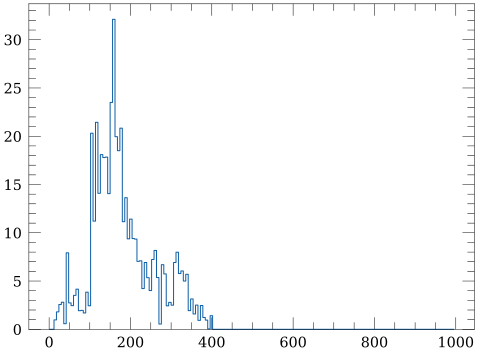

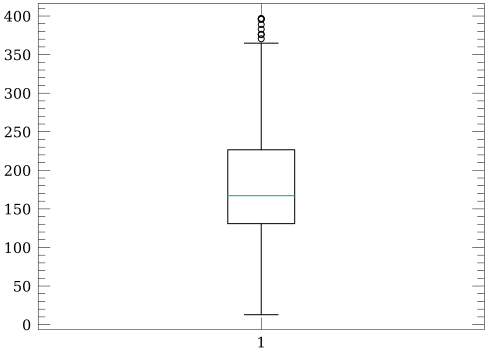

In [41]:
import NumpyTools
reload(NumpyTools)
from NumpyTools import weighted_quantile
for i, (index, row) in enumerate( df_concat.iterrows() ):
    print( GetKurtosis(row) )
    cut = (row["Time"]<400)
    plt.hist(row["Time"][cut], weights=row["Charge"][cut], bins=np.arange(0, 1000, 6), histtype="step")
    # plt.figure()
    # plt.boxplot(row["Time"][cut])

    break

In [61]:
import SeabornTools
reload(SeabornTools)
from SeabornTools import JointPlot
import NumpyTools
reload(NumpyTools)
from NumpyTools import weighted_kurtosis, weighted_skew
def CutByQuartile( row ):
    cut = (row["Time"]<480)
    t_start, t_end = weighted_quantile( row["Time"][cut],sample_weight=row["Charge"][cut], quantiles=[0, 1])
    cut_quartile = ( row["Time"]>t_start ) & ( row["Time"]<t_end )
    return cut_quartile

def GetKurtosis( row ):
    cut_quartile = CutByQuartile( row )
    return weighted_kurtosis( row["Time"][ cut_quartile ] ,wts = row["Charge"][ cut_quartile ])

def GetSkewness( row ):
    cut_quartile = CutByQuartile( row )
    return weighted_skew( row["Time"][ cut_quartile ] ,wts = row["Charge"][ cut_quartile ])

def GetIntervalOfQuartiles(row):
    cut = (row["Time"]<1000)
    t_start, t_end = weighted_quantile( row["Time"][cut],sample_weight=row["Charge"][cut], quantiles=[0.25, 0.75])
    return t_end-t_start
    
    

df_concat["Kurtosis"] = df_concat.apply( GetKurtosis, axis=1 )
df_concat["Skewness"] = df_concat.apply( GetSkewness, axis=1 )
df_concat["IntervalQuartiles"] = df_concat.apply( GetIntervalOfQuartiles, axis=1)


<Figure size 576x432 with 0 Axes>

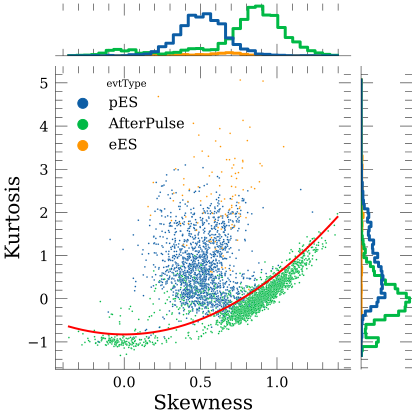

In [68]:
import scipy.optimize as so
def func(x, a, b):
    return a*x**2 + b

plt.figure()

g = JointPlot(y="Kurtosis", x="Skewness", data=df_concat,hue="evtType")
# plt.title(f"{time_cut} ns")
df_curves = pd.read_csv("/afs/ihep.ac.cn/users/l/luoxj/PSD_Supernova/code/Curves/Curves_cut.csv",names=["x", "y"])
df_curves["y"] -= 2.8
popt, pcov = so.curve_fit(func, df_curves["x"], df_curves["y"])

x = np.linspace( min(df_concat["Skewness"]), max(df_concat["Skewness"]), 500  )
g.ax_joint.plot( x, func( x, *popt), linewidth=2, color="r", )
# print(*popt)

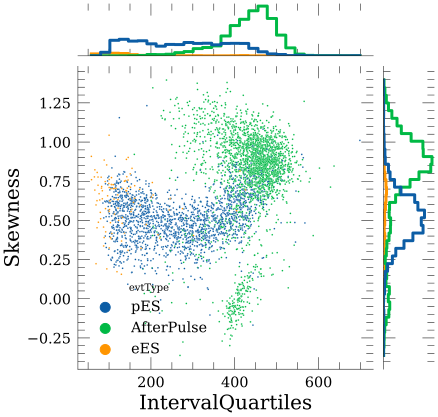

In [37]:
g = JointPlot(y="Skewness", x="IntervalQuartiles", data=df_concat,hue="evtType")

Counter({'AfterPulse': 1971, 'pES': 63, 'eES': 4})


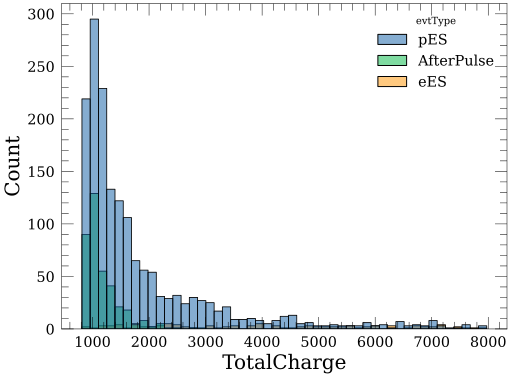

In [28]:
from collections import Counter
import seaborn as sns
sns.histplot ( x="TotalCharge", data=df_concat [ df_concat["Kurtosis"]-func(df_concat["Skewness"], *popt)>0 ], hue="evtType" )
print( Counter( df_concat["evtType"] [ df_concat["Kurtosis"]-func(df_concat["Skewness"], *popt)<0 ] ))


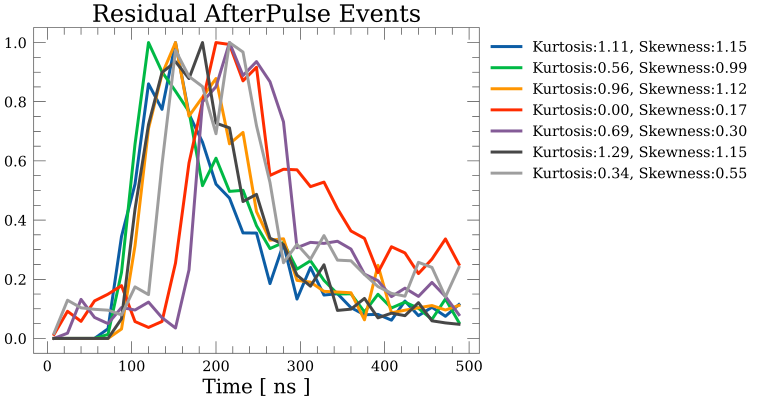

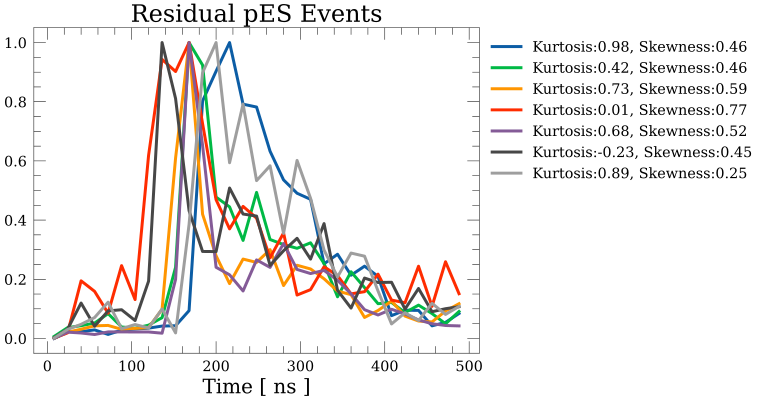

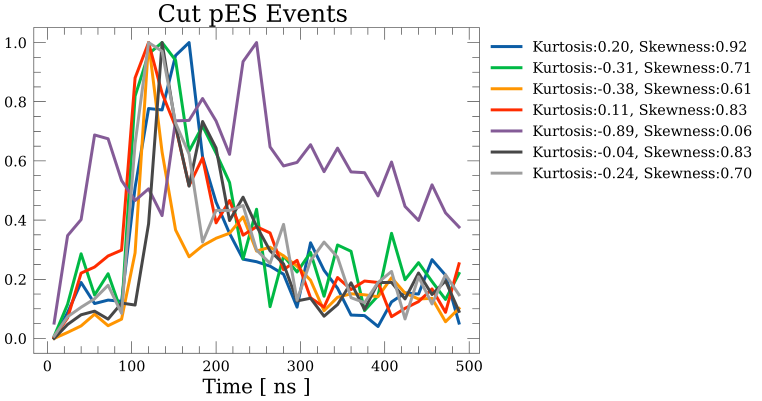

In [70]:
bins = np.arange(0, 500, 16)
from HistTools import GetBinCenter
# v_index = [  (df_concat["Skewness"]>1) & (df_concat["evtType"]=="pES"),
#              (df_concat["Skewness"]>1) & (df_concat["evtType"]=="AfterPulse"),
#              (df_concat["Skewness"]<0) & (df_concat["evtType"]=="pES"),
#              (df_concat["Skewness"]<0) & (df_concat["evtType"]=="AfterPulse")]
#
v_index = [ ( df_concat["Kurtosis"]-func(df_concat["Skewness"], *popt)>0 )& (df_concat["evtType"]=="AfterPulse"),
            ( df_concat["Kurtosis"]-func(df_concat["Skewness"], *popt)>0 )& (df_concat["evtType"]=="pES"),
             ( df_concat["Kurtosis"]-func(df_concat["Skewness"], *popt)<0 )& (df_concat["evtType"]=="pES") ]
v_titles= ["Residual AfterPulse Events", "Residual pES Events", "Cut pES Events "]
for cut, title in zip( v_index, v_titles):
    plt.figure()

    for i, (index, row) in enumerate( df_concat[ cut ].iterrows() ):
        h, bins = np.histogram(row["Time"], weights=row["Charge"], bins=bins)
        plt.plot(GetBinCenter(bins), h/max(h), label=f"Kurtosis:{row['Kurtosis']:.2f}, Skewness:{row['Skewness']:.2f}")

        if i>5:
            break
    plt.title(title)
    plt.legend(bbox_to_anchor=(1,1))
    plt.xlabel("Time [ ns ]")